In [31]:
import pandas as pd

In [32]:
import pandas as pd

# Data Exploration

In [33]:
df_fact_bookings=pd.read_csv('datasets/fact_bookings.csv', index_col='booking_id')
df_fact_bookings.head()
                             

,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
booking_id,,,,,,,,,,,
May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [34]:
df_fact_bookings.shape

(134590, 11)

In [35]:
distinct_values = df_fact_bookings['booking_platform'].unique()
distinct_values


array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64


<Axes: ylabel='booking_platform'>

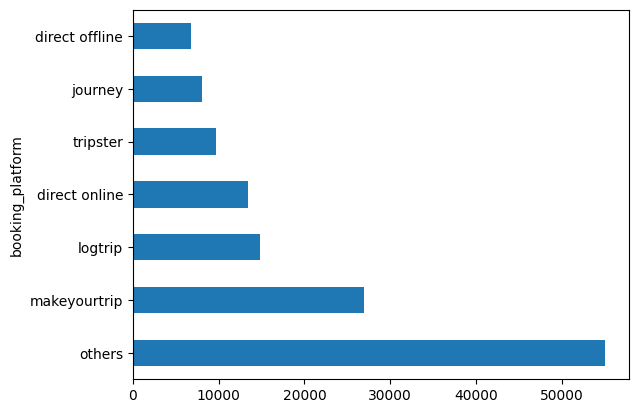

In [36]:
c = df_fact_bookings['booking_platform'].value_counts()
distinct_count = df_fact_bookings['booking_platform'].value_counts().plot(kind='barh')
print(c)
distinct_count

In [37]:
df_date=pd.read_csv('datasets/dim_date.csv')
df_hotels=pd.read_csv('datasets/dim_hotels.csv')
df_rooms=pd.read_csv('datasets/dim_rooms.csv')
df_fact_aggregated_bookings=pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_new_data_august=pd.read_csv('datasets/new_data_august.csv')

# Data Cleaning 

In [38]:
df_fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [39]:
df_fact_bookings=df_fact_bookings[df_fact_bookings.no_guests>0]
df_fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [40]:
df_fact_bookings.revenue_generated.min(),df_fact_bookings.revenue_generated.max()

(6500, 28560000)

In [41]:
avg,std=df_fact_bookings.revenue_generated.mean(),df_fact_bookings.revenue_generated.std()
avg,std

(15378.036937686695, 93040.1549314641)

In [42]:
higher_limit = avg+3*std
higher_limit

294498.50173207896

In [43]:
df_fact_bookings.shape

(134578, 11)

In [44]:
df_fact_bookings=df_fact_bookings[df_fact_bookings.revenue_generated<higher_limit]
df_fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [45]:
null_counts = df_fact_bookings.isnull().sum()
print(null_counts)


property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [46]:
df_fact_aggregated_bookings['capacity'] = df_fact_aggregated_bookings['capacity'].fillna(method='ffill')
print(df_fact_aggregated_bookings[df_fact_aggregated_bookings.capacity.isnull()])


Empty DataFrame
Columns: [property_id, check_in_date, room_category, successful_bookings, capacity]
Index: []


In [47]:
df_fact_aggregated_bookings[df_fact_aggregated_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [48]:
filtered_records = df_fact_aggregated_bookings[df_fact_aggregated_bookings['successful_bookings'] > df_fact_aggregated_bookings['capacity']]
print(filtered_records)


      property_id check_in_date room_category  successful_bookings  capacity
3           17558      1-May-22           RT1                   30      19.0
12          16563      1-May-22           RT1                  100      41.0
4136        19558     11-Jun-22           RT2                   50      39.0
6209        19560      2-Jul-22           RT1                  123      26.0
8522        19559     25-Jul-22           RT1                   35      24.0
9194        18563     31-Jul-22           RT4                   20      18.0


In [49]:
null_counts2 = df_new_data_august.isnull().sum()
print(null_counts2)

property_id            0
property_name          0
category               0
city                   0
room_category          0
room_class             0
check_in_date          0
mmm yy                 0
week no                0
day_type               0
successful_bookings    0
capacity               0
occ%                   0
dtype: int64


In [50]:
null_counts3 = df_fact_aggregated_bookings.isnull().sum()
print(null_counts3)

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64


# Data Transformation

In [51]:
df_fact_aggregated_bookings['occ_pct']= round(df_fact_aggregated_bookings['successful_bookings']/df_fact_aggregated_bookings['capacity']*100,2)
df_fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [52]:
df_fact_aggregated_bookings.drop('occ%', axis=1, inplace=True)


KeyError: "['occ%'] not found in axis"

# Insights Generation

#### 1. what is an avg occupancy rate in each of room category

In [ ]:
ooc_pct_category = df_fact_aggregated_bookings.groupby('room_category')['occ_pct'].mean()
ooc_pct_category

In [ ]:
df_rooms

In [ ]:
df_merged = pd.merge(df_fact_aggregated_bookings, df_rooms, left_on='room_category', right_on='room_id', how='inner')
df_merged.drop('room_id', axis=1, inplace=True)

df_merged

In [59]:
ooc_pct_category = df_merged.groupby('room_class')['occ_pct'].mean().round(2)
ooc_pct_category

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

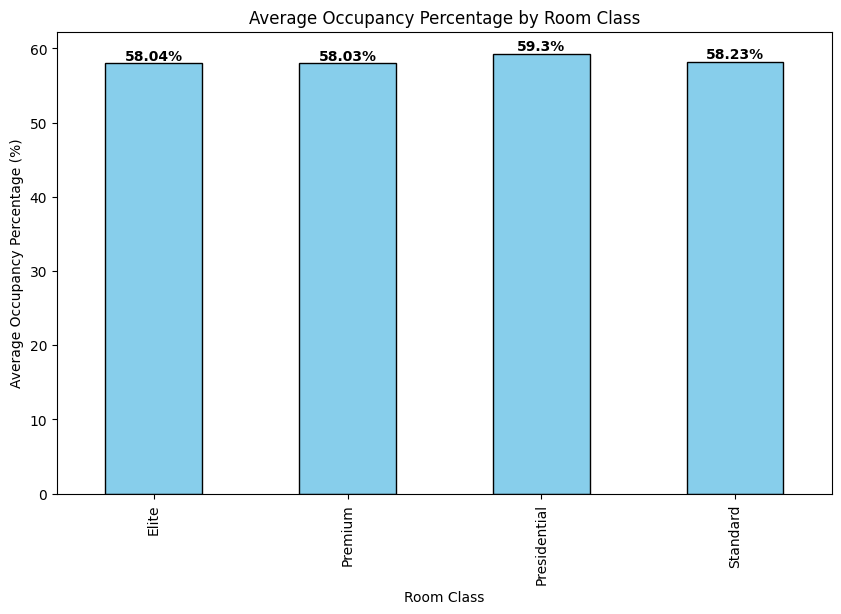

In [61]:
import matplotlib.pyplot as plt

ooc_pct_category = df_merged.groupby('room_class')['occ_pct'].mean().round(2)

plt.figure(figsize=(10, 6))
bars = ooc_pct_category.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Occupancy Percentage by Room Class')
plt.xlabel('Room Class')
plt.ylabel('Average Occupancy Percentage (%)')

for index, value in enumerate(ooc_pct_category):
    plt.text(index, value, f'{value}%', ha='center', va='bottom', fontweight='bold')


plt.show()


#### 2. what is an avg occupancy rate per city

In [56]:
df_merged_city = pd.merge(df_fact_aggregated_bookings, df_hotels, on='property_id')
df_merged_city.drop('property_id', axis=1, inplace=True)

df_merged_city

,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,1-May-22,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,2-May-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...
9195,30-Jul-22,RT4,9,15.0,60.00,Atliq City,Business,Hyderabad
9196,31-Jul-22,RT1,22,30.0,73.33,Atliq City,Business,Hyderabad
9197,31-Jul-22,RT2,34,40.0,85.00,Atliq City,Business,Hyderabad
9198,31-Jul-22,RT3,17,24.0,70.83,Atliq City,Business,Hyderabad


In [58]:
avg_occ_pct_city= df_merged_city.groupby('city')['occ_pct'].mean().round(2)
avg_occ_pct_city

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

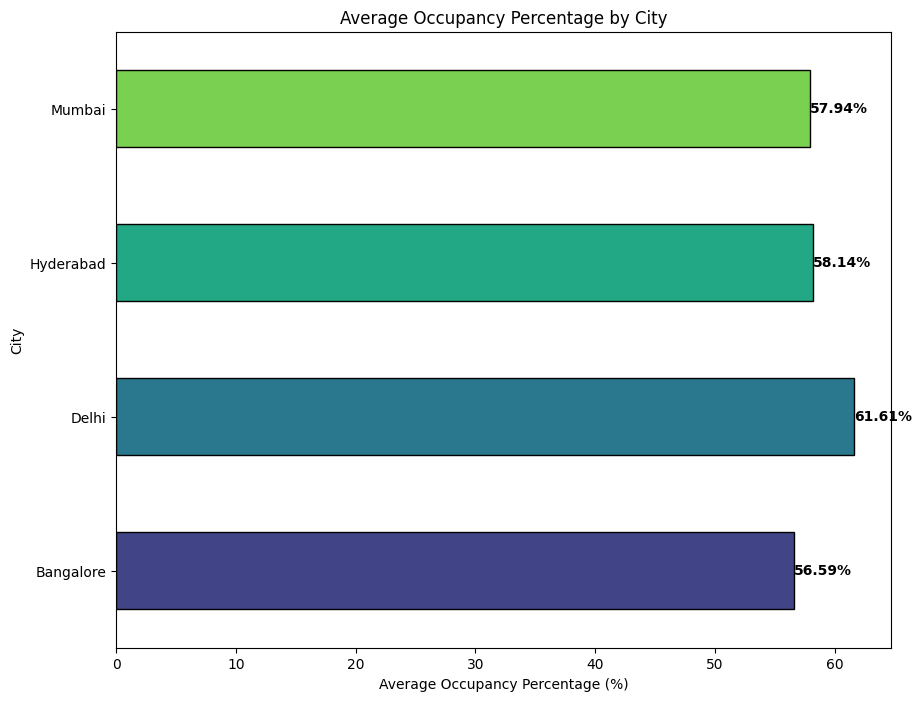

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_occ_pct_city = df_merged_city.groupby('city')['occ_pct'].mean().round(2)

colors = sns.color_palette("viridis", len(avg_occ_pct_city))

plt.figure(figsize=(10, 8))
bars = avg_occ_pct_city.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Average Occupancy Percentage by City')
plt.xlabel('Average Occupancy Percentage (%)')
plt.ylabel('City')

for index, value in enumerate(avg_occ_pct_city):
    plt.text(value, index, f'{value}%', va='center', ha='left', fontweight='bold')

plt.show()


#### 3. what is an avg occupancy rate (weekday and week end)

In [ ]:
df_fact_aggregated_bookings.head(2)

In [ ]:
df_date.head(2)

------

In [54]:
df_merged3 = pd.merge(df_fact_aggregated_bookings, df_date, left_on='check_in_date', right_on='date')
df_merged3.drop('date', axis=1, inplace=True)

df_merged3


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...
6495,16563,31-Jul-22,RT4,13,18.0,72.22,Jul 22,W 32,weekend
6496,16559,31-Jul-22,RT4,13,18.0,72.22,Jul 22,W 32,weekend
6497,17558,31-Jul-22,RT4,3,6.0,50.00,Jul 22,W 32,weekend
6498,19563,31-Jul-22,RT4,3,6.0,50.00,Jul 22,W 32,weekend


In [63]:
avg_occ_pct_days= df_merged3.groupby('day_type')['occ_pct'].mean().round(2)
avg_occ_pct_days

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

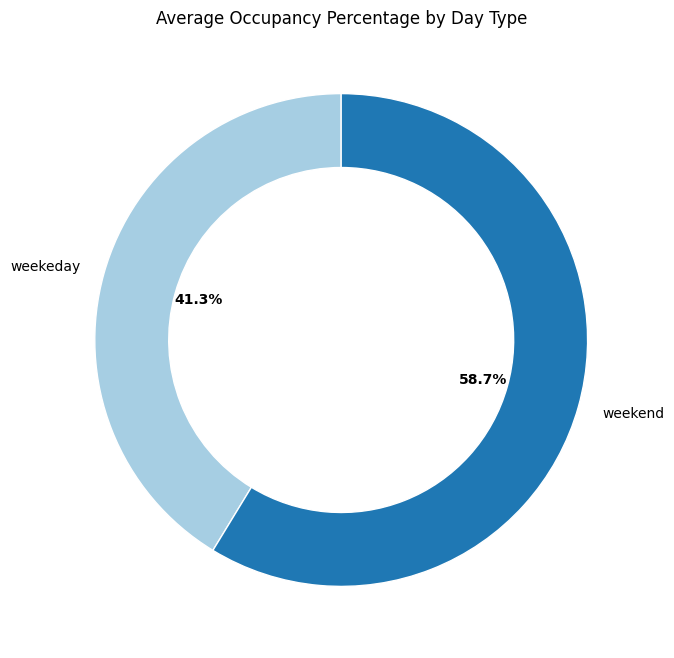

In [64]:
import matplotlib.pyplot as plt

avg_occ_pct_days = df_merged3.groupby('day_type')['occ_pct'].mean().round(2)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    avg_occ_pct_days, 
    labels=avg_occ_pct_days.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors,  
    wedgeprops={'width': 0.3, 'edgecolor': 'w'}
)

plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title('Average Occupancy Percentage by Day Type')

plt.show()


#### 4. In june month what is the occupancy rate city wise?

In [66]:
df_jun22= df_merged_city[df_merged_city.check_in_date.str.contains('Jun-22', case=False, na=False)]
df_jun22


,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
124,1-Jun-22,RT1,14,30.0,46.67,Atliq Exotica,Luxury,Mumbai
125,1-Jun-22,RT2,21,41.0,51.22,Atliq Exotica,Luxury,Mumbai
126,1-Jun-22,RT3,15,32.0,46.88,Atliq Exotica,Luxury,Mumbai
127,1-Jun-22,RT4,8,18.0,44.44,Atliq Exotica,Luxury,Mumbai
128,2-Jun-22,RT1,17,30.0,56.67,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...
9071,29-Jun-22,RT4,9,15.0,60.00,Atliq City,Business,Hyderabad
9072,30-Jun-22,RT2,24,40.0,60.00,Atliq City,Business,Hyderabad
9073,30-Jun-22,RT1,18,30.0,60.00,Atliq City,Business,Hyderabad
9074,30-Jun-22,RT3,14,24.0,58.33,Atliq City,Business,Hyderabad


In [67]:
avg_occ_pct_city_jun= df_jun22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)
avg_occ_pct_city_jun

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ_pct, dtype: float64

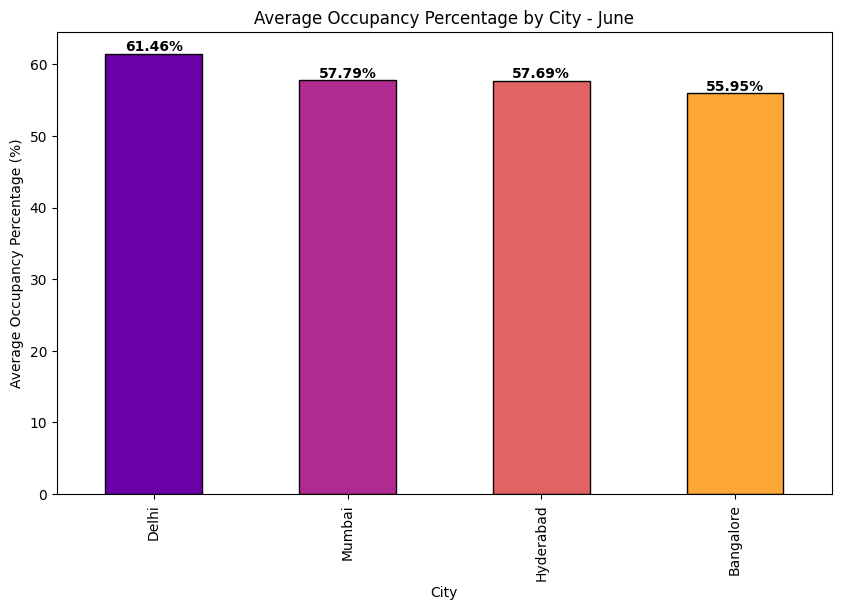

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_occ_pct_city_jun = df_jun22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

colors = sns.color_palette("plasma", len(avg_occ_pct_city_jun))

plt.figure(figsize=(10, 6))
bars = avg_occ_pct_city_jun.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Average Occupancy Percentage by City - June')
plt.xlabel('City')
plt.ylabel('Average Occupancy Percentage (%)')

for index, value in enumerate(avg_occ_pct_city_jun):
    plt.text(index, value, f'{value}%', ha='center', va='bottom', fontweight='bold')

plt.show()


#### 5. Revenue realized City wise

In [ ]:
df_fact_bookings.head(3)

In [ ]:
df_hotels.head(3)

In [69]:
merge_city_revenue = pd.merge(df_fact_bookings,df_hotels, on='property_id')
merge_city_revenue.drop('property_id', axis=1, inplace=True)
merge_city_revenue.head()

,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


-----

In [70]:
revenue_by_city = merge_city_revenue.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)
revenue_by_city

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

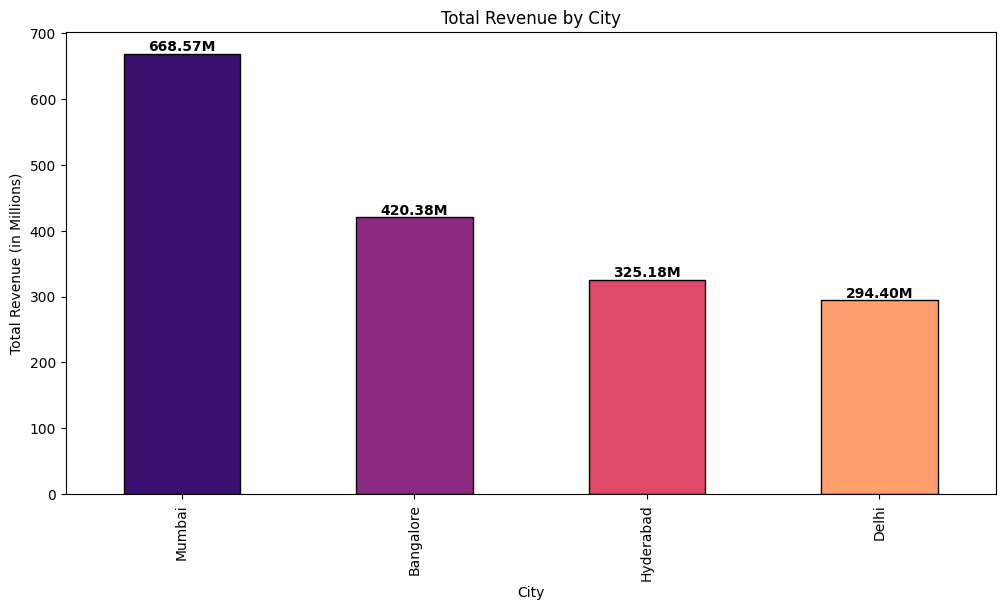

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

revenue_by_city = merge_city_revenue.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)
revenue_in_millions = revenue_by_city / 1_000_000
colors = sns.color_palette("magma", len(revenue_in_millions))

plt.figure(figsize=(12, 6))
bars = revenue_in_millions.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue (in Millions)')

for index, value in enumerate(revenue_in_millions):
    plt.text(index, value, f'{value:.2f}M', ha='center', va='bottom', fontweight='bold')

plt.show()


#### 6. Revenue by Month

In [79]:
df_hotels.tail(3)

,property_id,property_name,category,city
22,19562,Atliq Bay,Luxury,Bangalore
23,19563,Atliq Palace,Business,Bangalore
24,17564,Atliq Seasons,Business,Mumbai


In [80]:
df_fact_bookings.head(3)

,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
booking_id,,,,,,,,,,,
May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [81]:
df_fact_bookings['check_in_date']=df_fact_bookings['check_in_date'].str.replace('/', '-', regex=False)


In [82]:
df_fact_bookings= pd.merge(df_fact_bookings, df_hotels, on='property_id')
df_fact_bookings.head()

,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,16558,30-04-22,1-5-2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,16558,27-04-22,1-5-2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,16558,1/5/2022,1-5-2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,16558,28-04-22,1-5-2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,16558,26-04-22,1-5-2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [83]:
df_fact_bookings['booking_date']=pd.to_datetime(df_fact_bookings['booking_date'])
df_fact_bookings

C:\Users\sreehari s\AppData\Local\Temp\ipykernel_20656\4227777341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fact_bookings['booking_date']=pd.to_datetime(df_fact_bookings['booking_date'])


,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,16558,2022-04-30,1-5-2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,16558,2022-04-27,1-5-2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,16558,2022-01-05,1-5-2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,16558,2022-04-28,1-5-2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,16558,2022-04-26,1-5-2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,17564,2022-07-30,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,17564,2022-07-29,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,17564,2022-07-30,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,17564,2022-07-29,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [84]:
nan_counts = df_fact_bookings.isnull().sum()
print(nan_counts)

property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
property_name            0
category                 0
city                     0
dtype: int64


In [85]:
df_date['date']=pd.to_datetime(df_date['date'])
df_date

C:\Users\sreehari s\AppData\Local\Temp\ipykernel_20656\2458064437.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']=pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...
87,2022-07-27,Jul 22,W 31,weekeday
88,2022-07-28,Jul 22,W 31,weekeday
89,2022-07-29,Jul 22,W 31,weekeday
90,2022-07-30,Jul 22,W 31,weekend


In [76]:
na_counts = df_date.isnull().sum()
print(na_counts)

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64


In [75]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [86]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [87]:
new = pd.merge(df_fact_bookings, df_date, left_on='booking_date', right_on='date')
new.head()

,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,16558,2022-07-04,1-5-2022,6/5/2022,2.0,RT2,others,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday
1,16559,2022-07-04,1-5-2022,2/5/2022,3.0,RT3,others,NaN,Cancelled,22440,8976,Atliq Exotica,Luxury,Mumbai,2022-07-04,Jul 22,W 28,weekeday
2,16560,2022-07-04,1-5-2022,2/5/2022,2.0,RT2,others,3.0,Checked Out,12600,12600,Atliq City,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday
3,16560,2022-07-04,1-5-2022,2/5/2022,2.0,RT4,others,NaN,Cancelled,26600,10640,Atliq City,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday
4,16561,2022-07-04,1-5-2022,3/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Blu,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday


In [88]:
ans = new.groupby('mmm yy')['revenue_realized'].sum()
ans

mmm yy
Jul 22    326160921
Jun 22    390123323
May 22    398286993
Name: revenue_realized, dtype: int64

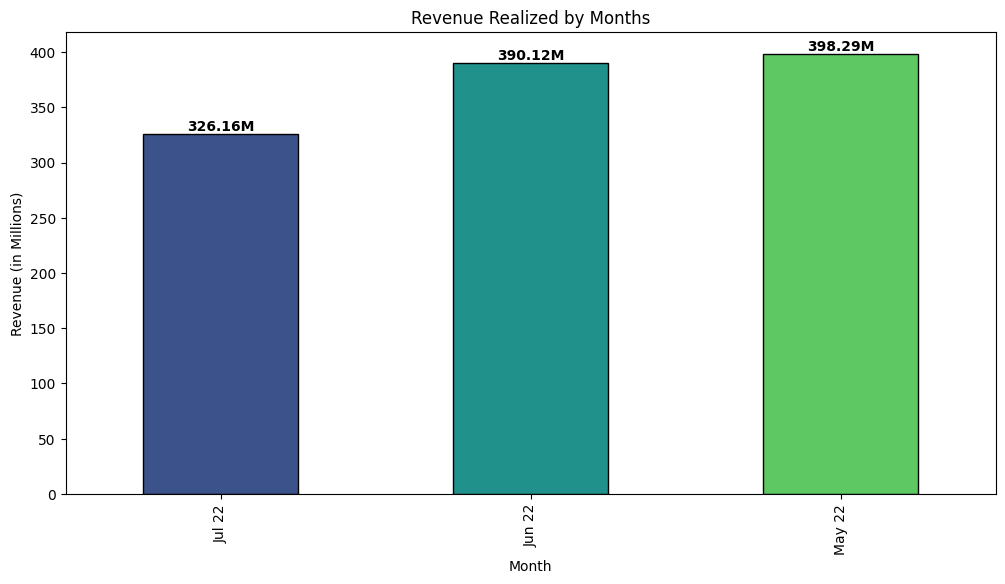

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

ans = new.groupby('mmm yy')['revenue_realized'].sum()

revenue_in_millions = ans / 1_000_000
colors = sns.color_palette("viridis", len(revenue_in_millions))

plt.figure(figsize=(12, 6))
bars = revenue_in_millions.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Revenue Realized by Months')
plt.xlabel('Month')
plt.ylabel('Revenue (in Millions)')

for index, value in enumerate(revenue_in_millions):
    plt.text(index, value, f'{value:.2f}M', ha='center', va='bottom', fontweight='bold')

plt.show()
